# Chapter 8: Greedy algorithms

- You learn how to tackle the impossible: problems that have no fast algorithmic solution (NP-complete problems).
- You learn how to identify such problems when you see them, so you don’t waste time trying to find a fast algorithm for them.
- You learn about approximation algorithms, which you can use to find an approximate solution to an NP-complete problem quickly.
- You learn about the greedy strategy, a very simple problem-solving strategy

## The classroom scheduling problem

Suppose you have a classroom and want to hold as many classes here as possible. You get a list of classes.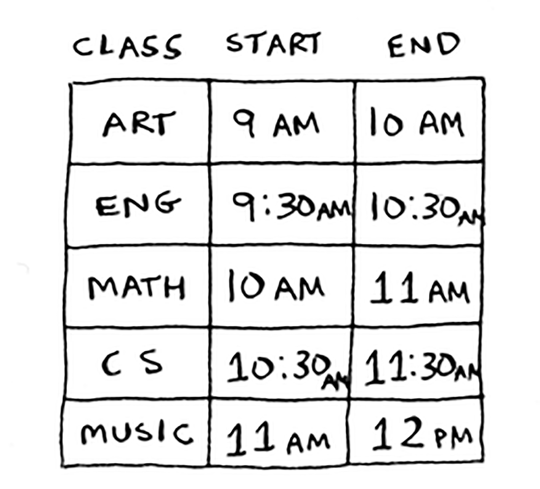

Sounds like a hard problem, right? Actually, the algorithm is so easy, it might surprise you. Here’s how it works:
1. Pick the class that ends the soonest. This is the first class you’ll hold in this classroom.
2. Now, you have to pick a class that starts after the first class. Again, pick the class that ends the soonest. This is the second class you’ll hold.

Keep doing this, and you’ll end up with the answer! Let’s try it out. Art ends the soonest, at 10:00 a.m., so that’s one of the classes you pick.

A greedy algorithm is simple: at each step, pick the optimal move. In this case, each time you pick a class, you pick the class that ends the soonest. In technical terms: at each step you pick the locally optimal solution, and in the end you’re left with the globally optimal solution. Believe it or not, this simple algorithm finds the optimal solution to this scheduling problem!

Obviously, greedy algorithms don’t always work. But they’re simple to
write! Let’s look at another example.

## The knapsack problem

Suppose you’re a greedy thief. You’re in a store with a knapsack, and there are all these items you can steal. But you can only take what you can fit in your knapsack. The knapsack can hold 35 pounds.
You’re trying to maximize the value of the items you put in your knapsack. What algorithm do you use?

Again, the greedy strategy is pretty simple:
1. Pick the most expensive thing that will fit in your knapsack.
2. Pick the next most expensive thing that will fit in your knapsack. And so on.

Except this time, it doesn’t work! For example, suppose there are three items you can steal.
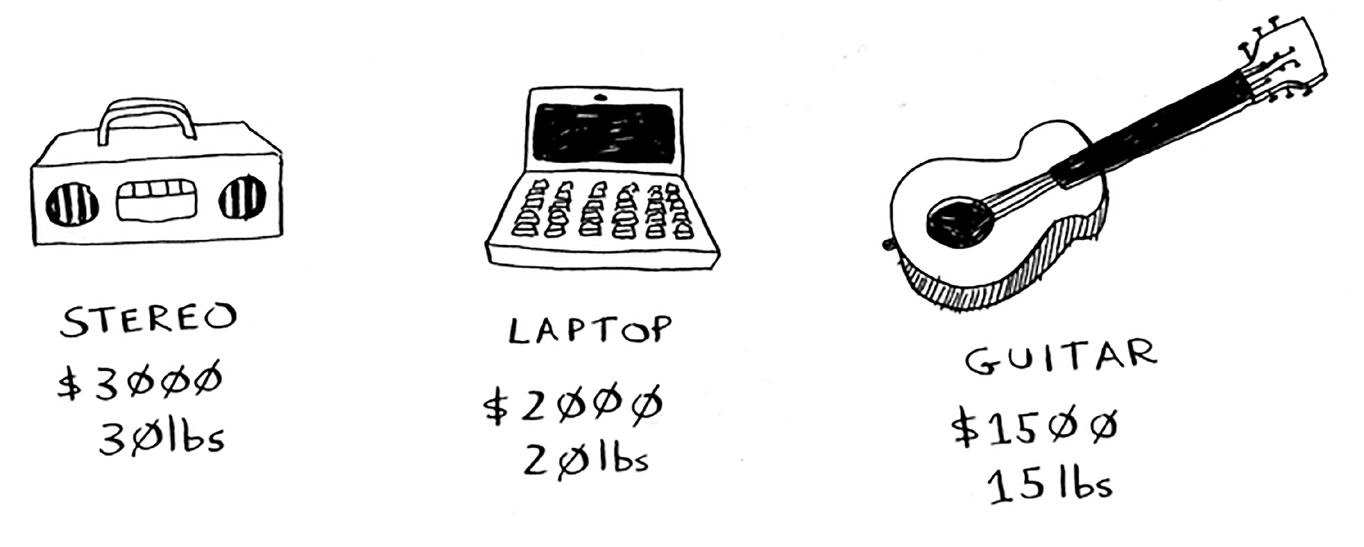

Your knapsack can hold 35 pounds of items. The stereo system is the most expensive, so you steal that. Now you don’t have space for anything else.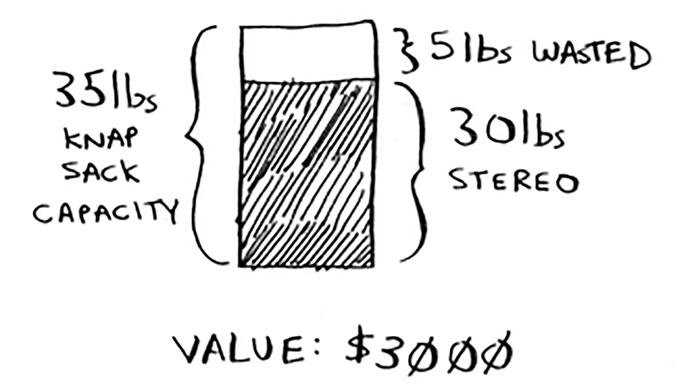

You got $3,000 worth of goods. But wait! If you’d picked the laptop and the guitar instead, you could have had $3,500 worth of loot!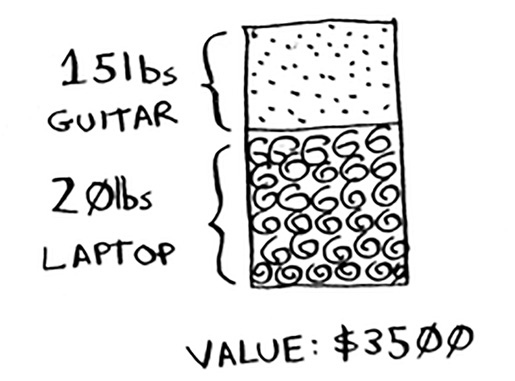

Clearly, the greedy strategy doesn’t give you the optimal solution here. But it gets you pretty close. In the next chapter, I’ll explain how to calculate the correct solution. But if you’re a thief in a shopping center, you don’t care about perfect. “Pretty good” is good enough. Here’s the takeaway from this second example: sometimes, perfect is the enemy of good. Sometimes all you need is an  algorithm that solves the problem pretty well. And that’s where greedy algorithms shine, because they’re simple to write and usually get pretty close.

## Exercises

### 8.1 You work for a furniture company, and you have to ship furniture all over the country. You need to pack your truck with boxes. All the boxes are of different sizes, and you’re trying to maximize the space you use in each truck. How would you pick boxes to maximize space? Come up with a greedy strategy. Will that give you the optimal solution?

**Answer**
A greedy strategy would be to pick the largest box that will fit in the remaining space, and repeat until you can’t pack any more boxes. No, this won’t give you the optimal solution.

### 8.1 You’re going to Europe, and you have seven days to see everything you can. You assign a point value to each item (how much you want to see it) and estimate how long it takes. How can you maximize the point total (seeing all the things you really want to see) during your stay? Come up with a greedy strategy. Will that give you the optimal solution?

**Answer**
Keep picking the activity with the highest point value that you can still do in the time you have left. Stop when you can’t do anything else. No, this won’t give you the optimal solution.

## The set covering problem

### Approximation algorithms

Greedy algorithms to the rescue! Here’s a greedy algorithm that comes pretty close:
1. Pick the station that covers the most states that haven’t been covered yet. It’s OK if the station covers some states that have been covered already.
2. Repeat until all the states are covered.

This is called an approximation algorithm. When calculating the exact solution will take too much time, an approximation algorithm will work. Approximation algorithms are judged by
• How fast they are
• How close they are to the optimal solution

Greedy algorithms are a good choice because not only are they simple to come up with, but that simplicity means they usually run fast, too. In this case, the greedy algorithm runs in O(n^2) time, where n is the number of radio stations.

Let’s see how this problem looks in code.

#### Code for setup

For this example, I’m going to use a subset of the states and the stations to keep things simple.

First, make a list of the states you want to cover:

In [7]:
states_needed = set(["mt", "wa", "or", "id", "nv", "ut", "ca", "az"])  # You pass an array in, and it gets converted to a set.

I used a set for this. A set is like a list, except that each item can show up only once in a set. Sets can’t have duplicates. For example, suppose you had this list:

    arr = [1, 2, 2, 3, 3, 3]

And you converted it to a set:

    set(arr)
    set([1, 2, 3])

1, 2, and 3 all show up just once in a set.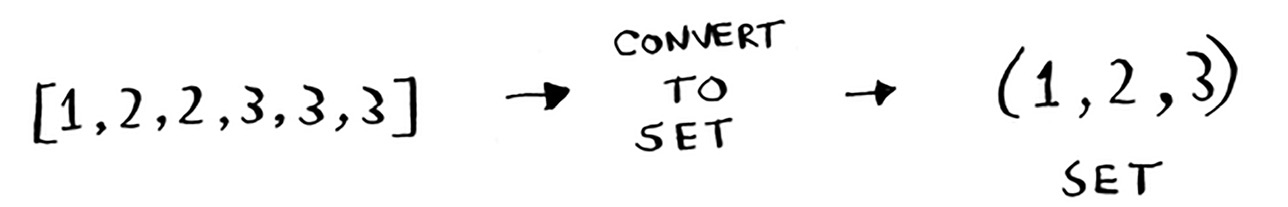

You also need the list of stations that you’re choosing from. I chose to use a hash for this:

In [8]:
stations = {}
stations["kone"] = set(["id", "nv", "ut"])
stations["ktwo"] = set(["wa", "id", "mt"])
stations["kthree"] = set(["or", "nv", "ca"])
stations["kfour"] = set(["nv", "ut"])
stations["kfive"] = set(["ca", "az"])

The keys are station names, and the values are the states they cover. So in this example, the kone station covers Idaho, Nevada, and Utah. All the values are sets, too. Making everything a set will make your life easier, as you’ll see soon.
Finally, you need something to hold the final set of stations you’ll use:

In [9]:
final_stations = set()

#### Calculating the answer

Now you need to calculate what stations you’ll use. Take a look at the image at right, and see if you can predict what stations you should use.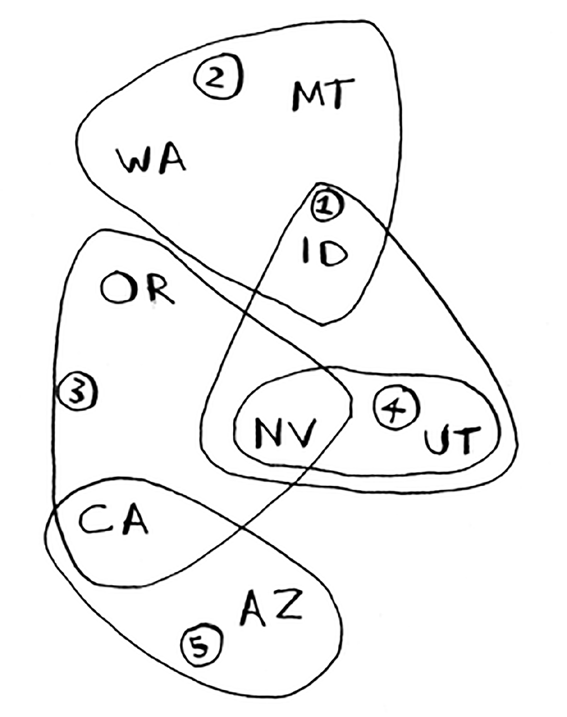

There can be more than one correct solution. You need to go through every station and pick the one that covers the most uncovered states. I’ll call this best_station:

In [10]:
best_station = None

states_covered is a set of all the states this station covers that haven’t been covered yet.

In [11]:
states_covered = set()

The for loop allows you to loop over every station to see which one is the best station. Let’s look at the body of the for loop:

In [18]:
while states_needed:
    best_station = None
    states_covered = set()
    for station, states in stations.items():   
        covered = states_needed & states    # New syntax! This is called a set intersection
        if len(covered) > len(states_covered):
            best_station = station
            states_covered = covered
            
    states_needed -= states_covered
    final_stations.add(best_station)
    
print(final_stations)

{'ktwo', 'kthree', 'kfive', 'kone'}


Is that what you expected? Instead of stations 1, 2, 3, and 5, you could have chosen stations 2, 3, 4, and 5. Let’s compare the run time of the greedy algorithm to the exact algorithm.
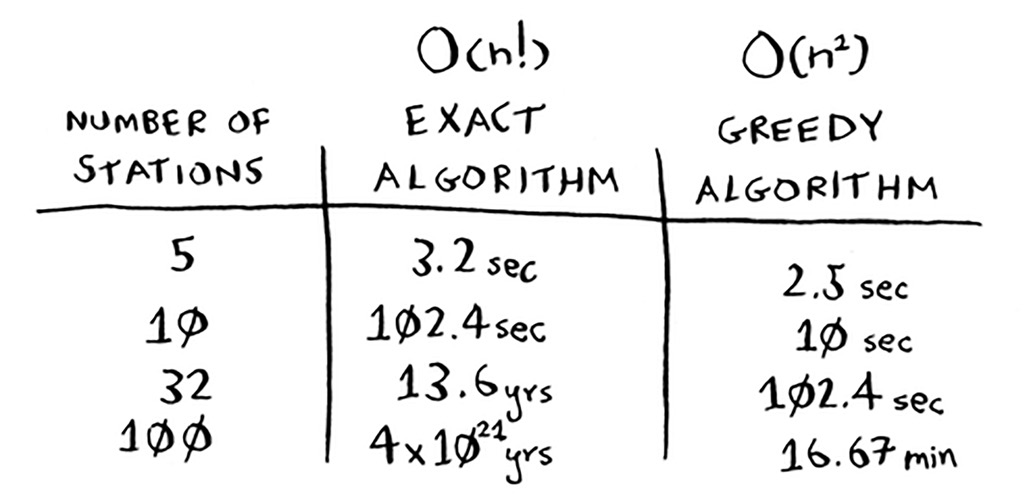

## Exercises

For each of these algorithms, say whether it’s a greedy algorithm or not.

### 8.3 Quicksort

**Answer**
No

### 8.4 Breadth-first search

**Answer**
Yes

### 8.5 Dijkstra’s algorithm

**Answer**
Yes

## NP-complete problems

There’s no easy way to tell if the problem you’re working on is NP-complete. Here are some giveaways:
- Your algorithm runs quickly with a handful of items but really slows down with more items.
- “All combinations of X” usually point to an NP-complete problem.
- Do you have to calculate “every possible version” of X because you can’t break it down into smaller sub-problems? Might be NP-complete.
- If your problem involves a sequence (such as a sequence of cities, like traveling salesperson), and it’s hard to solve, it might be NP-complete.
- If your problem involves a set (like a set of radio stations) and it’s hard to solve, it might be NP-complete.
- Can you restate your problem as the set-covering problem or the traveling-salesperson problem? Then your problem is definitely NP-complete.

## Exercises

### 8.6 A postman needs to deliver to 20 homes. He needs to find the shortest route that goes to all 20 homes. Is this an NP-complete problem?

**Answer**
Yes

### 8.7 Finding the largest clique in a set of people (a clique is a set of people who all know each other). Is this an NP-complete problem?

**Answer**
Yes

### 8.8 You’re making a map of the USA, and you need to color adjacent states with different colors. You have to find the minimum number of colors you need so that no two adjacent states are the same color. Is this an NP-complete problem?

**Answer**
Yes

## Recap

- Greedy algorithms optimize locally, hoping to end up with a global optimum.
- NP-complete problems have no known fast solution.
- If you have an NP-complete problem, your best bet is to use an approximation algorithm.
- Greedy algorithms are easy to write and fast to run, so they make good approximation algorithms.